In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
acciones = ["AMZN", "TSLA", "MSFT", "NFLX", "META", "PYPL"]
datos= yf.download(acciones, start="2020-01-01", end= "2024-01-01", interval="1d")["Close"]

/tmp/ipython-input-590467797.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos= yf.download(acciones, start="2020-01-01", end= "2024-01-01", interval="1d")["Close"]
[*********************100%***********************]  6 of 6 completed


In [5]:
datos

Ticker,AMZN,META,MSFT,NFLX,PYPL,TSLA
Date,,,,,,
2020-01-02,94.900497,208.494690,152.791107,329.809998,110.750000,28.684000
2020-01-03,93.748497,207.391479,150.888626,325.899994,108.760002,29.534000
2020-01-06,95.143997,211.297440,151.278610,335.829987,110.169998,30.102667
2020-01-07,95.343002,211.754608,149.899277,330.750000,109.669998,31.270666
2020-01-08,94.598503,213.901367,152.286911,339.260010,111.820000,32.809334
...,...,...,...,...,...,...
2023-12-22,153.419998,351.224854,369.767914,486.760010,61.840000,252.539993
2023-12-26,153.410004,352.655975,369.846863,491.190002,62.560001,256.609985
2023-12-27,153.339996,355.637604,369.264465,491.790009,62.680000,261.440002


In [6]:
print(datos["AMZN"])

Date
2020-01-02     94.900497
2020-01-03     93.748497
2020-01-06     95.143997
2020-01-07     95.343002
2020-01-08     94.598503
                 ...    
2023-12-22    153.419998
2023-12-26    153.410004
2023-12-27    153.339996
2023-12-28    153.380005
2023-12-29    151.940002
Name: AMZN, Length: 1006, dtype: float64


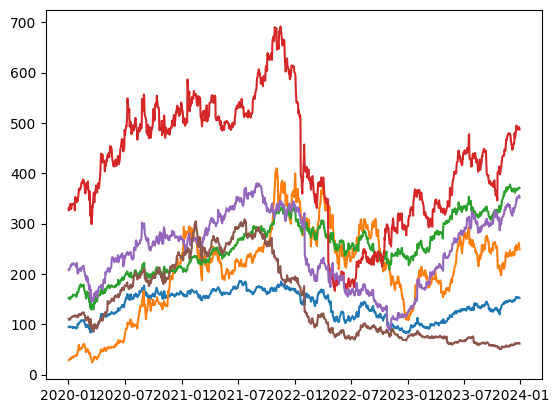

In [7]:
for ticker in acciones:
    plt.plot(datos[ticker], label=ticker)

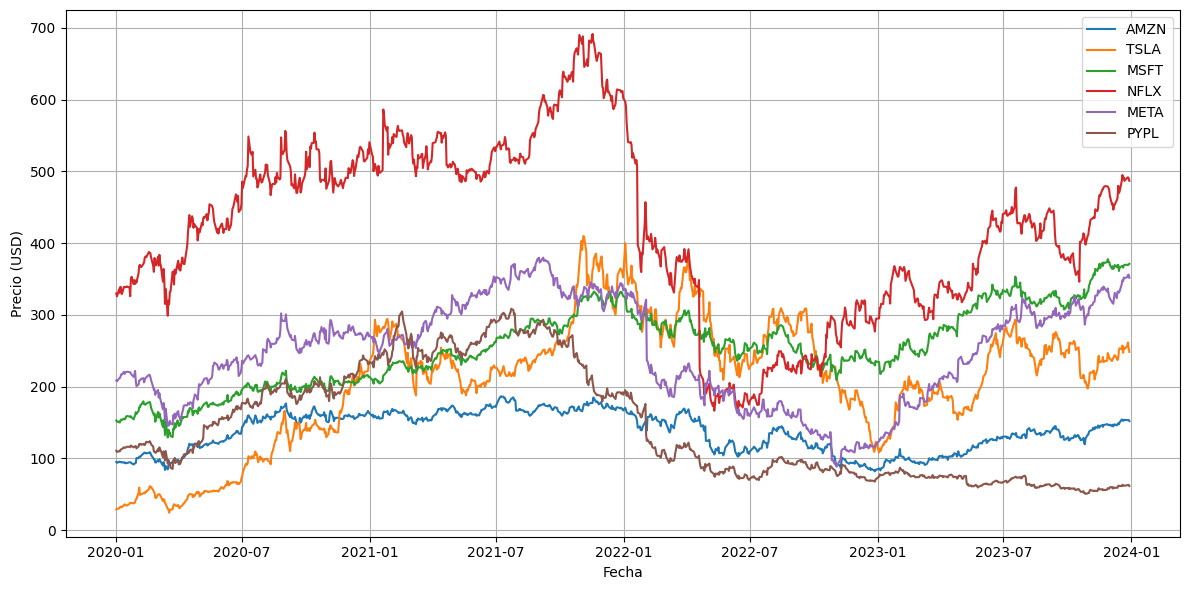

In [8]:
plt.figure(figsize=(12, 6))
for ticker in acciones:
    plt.plot(datos[ticker], label=ticker)
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend() # leyenda bloque
plt.grid(True) # grilla
plt.tight_layout() ## areglar eje x
plt.show()

Rendimiento diarios

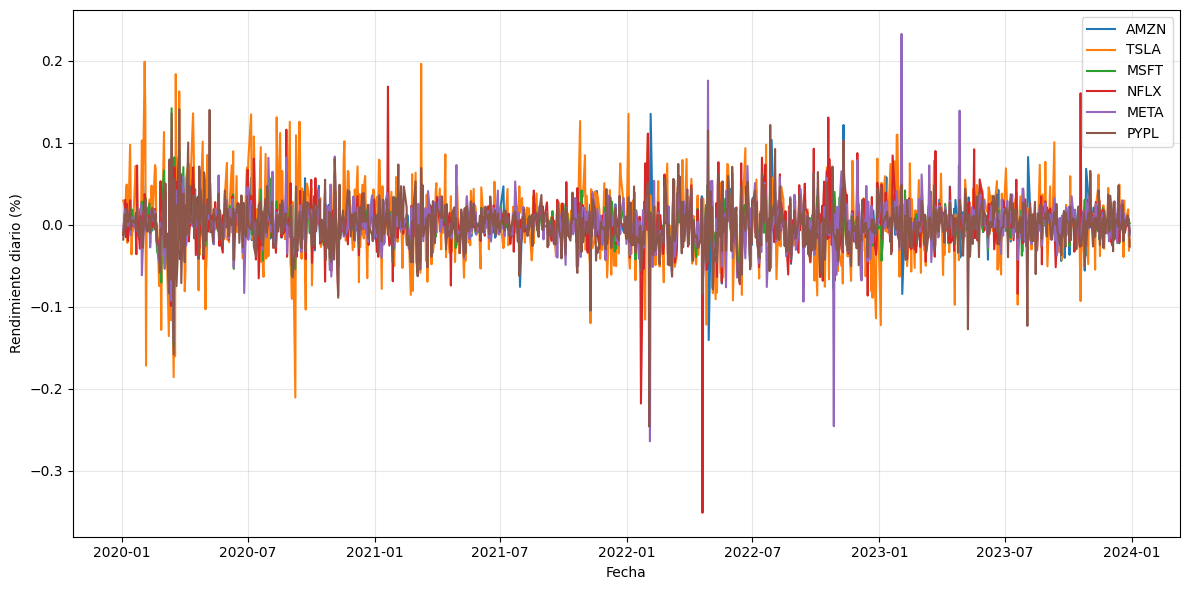

In [9]:
rendimientos_diarios = datos.pct_change().dropna()
plt.figure(figsize=(12, 6))
for ticker in acciones:
    plt.plot(rendimientos_diarios[ticker], label=ticker)
plt.xlabel("Fecha")
plt.ylabel("Rendimiento diario (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Rendimiento anualizado

In [10]:
rendimiento_promedio = rendimientos_diarios.mean(axis=0)
rendimiento_anual = rendimiento_promedio*252
print(rendimiento_anual)

Ticker
AMZN    0.188953
META    0.242660
MSFT    0.275846
NFLX    0.220919
PYPL   -0.035255
TSLA    0.773575
dtype: float64


Desviación anual

In [11]:
volatilidad_promedio = rendimientos_diarios.std(axis=0)
volatilidad_anual = volatilidad_promedio*np.sqrt(252)
print(volatilidad_anual)

Ticker
AMZN    0.376880
META    0.467802
MSFT    0.326155
NFLX    0.486847
PYPL    0.471710
TSLA    0.681044
dtype: float64


Text(0, 0.5, 'Rendimiento Anual')

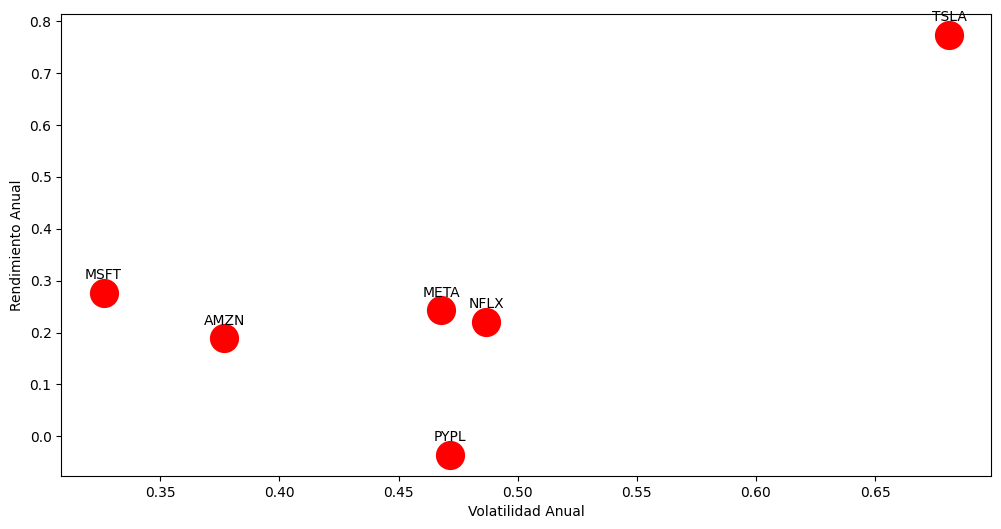

In [12]:
x_valores = volatilidad_anual.values
y_valores = rendimiento_anual.values
plt.figure(figsize=(12, 6))
plt.plot(x_valores, y_valores, "ro", ms=20)
for ticker in acciones:
    x=volatilidad_anual[ticker]
    y=rendimiento_anual[ticker]
    plt.annotate(ticker, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")
plt.xlabel("Volatilidad Anual")
plt.ylabel("Rendimiento Anual")

In [13]:
## un rendimiento mas alto lleva a asumir un nivel de riesgo mayor.
## la diversificacion de activos en un portafolio puede reducir signififcativamene el riesgo.

Crear portafolios


In [14]:
activos= ["AAPL", "MSFT", "GOOGL", "DIS"]
precios= yf.download(activos, start="2020-01-01", end= "2024-01-01", interval="1d")["Close"]

/tmp/ipython-input-115305015.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  precios= yf.download(activos, start="2020-01-01", end= "2024-01-01", interval="1d")["Close"]
[*********************100%***********************]  4 of 4 completed


In [15]:
rendimientos = precios.pct_change()
print(rendimientos)

Ticker          AAPL       DIS     GOOGL      MSFT
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.009722 -0.011471 -0.005231 -0.012452
2020-01-06  0.007968 -0.005802  0.026654  0.002585
2020-01-07 -0.004703  0.000343 -0.001932 -0.009118
2020-01-08  0.016086 -0.002059  0.007118  0.015928
...              ...       ...       ...       ...
2023-12-22 -0.005547 -0.010867  0.007620  0.002784
2023-12-26 -0.002841 -0.000769  0.000212  0.000214
2023-12-27  0.000518 -0.006267 -0.008126 -0.001575
2023-12-28  0.002226  0.000221 -0.000998  0.003235
2023-12-29 -0.005424 -0.001217 -0.003850  0.002025

[1006 rows x 4 columns]


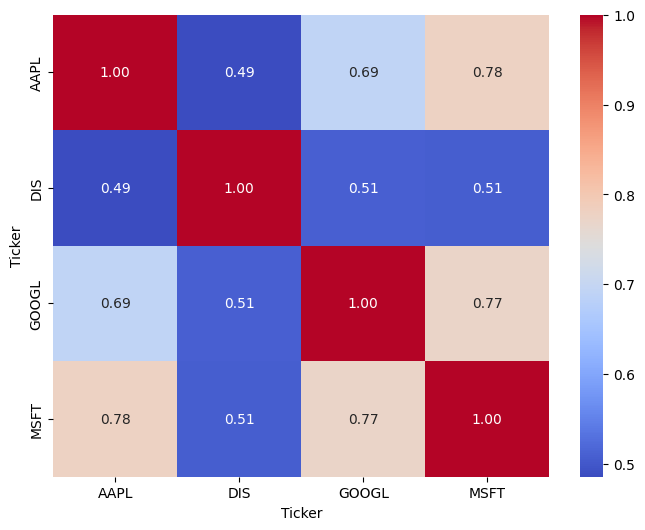

In [16]:
import seaborn as sns
correlacion = rendimientos.corr().dropna()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [17]:
## Matriz de covarianza
covarianza = rendimientos.cov()
print(covarianza)

Ticker      AAPL       DIS     GOOGL      MSFT
Ticker                                        
AAPL    0.000447  0.000231  0.000309  0.000338
DIS     0.000231  0.000506  0.000242  0.000234
GOOGL   0.000309  0.000242  0.000446  0.000335
MSFT    0.000338  0.000234  0.000335  0.000422


In [18]:
## pesos portafolio
pesos= np.array([0.25,0.25,0.25, 0.25])
pesos

array([0.25, 0.25, 0.25, 0.25])

In [19]:
## rendimieintos protafolio nualizado
rendimiento_portafolio = np.sum(rendimientos.mean()*pesos)*252
print(rendimiento_portafolio)

0.18757811486915818


In [20]:
## volatilidad protafolio nualizado
volatilidad_anual = np.sqrt(np.dot(pesos, np.dot(covarianza, pesos)))*np.sqrt(252)
print(volatilidad_anual)



0.2861553068079228


In [21]:
### crear portafolios

numero_portafolios = 5_000
resultados= np.zeros((3, numero_portafolios))
pesos_lista= []

In [22]:
for i in range(numero_portafolios):
  pesos= np.random.random(4)
  pesos /= np.sum(pesos)
  #pesos_lista.append(pesos)

  #caluclar retorno y volatilidad del protafolio
  retorno_portafolio = np.sum(rendimientos.mean()*pesos)*252
  volatilidad_anual = np.sqrt(np.dot(pesos, np.dot(covarianza, pesos)))*np.sqrt(252)

  ## almacenar resultados
  resultados[0, i]= retorno_portafolio
  resultados[1, i]= volatilidad_anual
  resultados[2, i]= (retorno_portafolio - 0.03) / volatilidad_anual
  pesos_lista.append(pesos)


In [23]:
resultados=pd.DataFrame(resultados.T, columns=["Rendimiento", "Volatilidad", "Sharpe"])
resultados

,Rendimiento,Volatilidad,Sharpe
0,0.154469,0.285765,0.435563
1,0.264072,0.301440,0.776513
2,0.144034,0.288710,0.394977
3,0.211437,0.289037,0.627727
4,0.255963,0.301152,0.750329
...,...,...,...
4995,0.230634,0.292479,0.685978
4996,0.182209,0.287920,0.528649
4997,0.208279,0.291794,0.610978
4998,0.163185,0.288070,0.462336


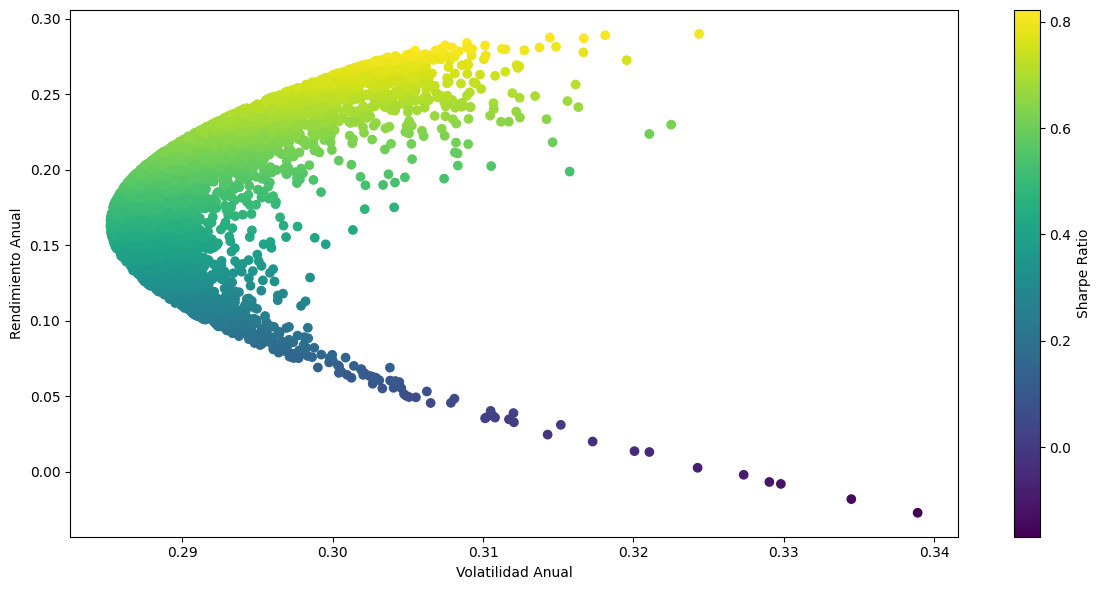

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(resultados["Volatilidad"], resultados["Rendimiento"], c=resultados["Sharpe"], cmap="viridis")
plt.xlabel("Volatilidad Anual")
plt.ylabel("Rendimiento Anual")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()

In [29]:
idx_min_var = resultados["Volatilidad"].idxmin()
idx_max_sharpe = resultados["Sharpe"].idxmax()
print("mínima varianza:", idx_min_var)
print("máximo Sharpe:", idx_max_sharpe)

mínima varianza: 1417
máximo Sharpe: 1893


In [42]:
pesos_min_var = pesos_lista[idx_min_var]
pesos_max_sharpe = pesos_lista[idx_max_sharpe]

activos = ["AAPL", "MSFT", "GOOGL", "DIS"]
print("Mínima Varianza")
print(pd.Series(pesos_min_var, index=activos).map(lambda x: f"{x:.2%}"))
print("Retorno:", f"{resultados.loc[idx_min_var, 'Rendimiento']:.2%}",
      "- Volatilidad:", f"{resultados.loc[idx_min_var, 'Volatilidad']:.2%}",
      "- Sharpe:", f"{resultados.loc[idx_min_var, 'Sharpe']:.2f}")

print("Máximo Sharpe")
print(pd.Series(pesos_max_sharpe, index=activos).map(lambda x: f"{x:.2%}"))
print("Retorno:", f"{resultados.loc[idx_max_sharpe, 'Rendimiento']:.2%}",
      "- Volatilidad:", f"{resultados.loc[idx_max_sharpe, 'Volatilidad']:.2%}",
      "- Sharpe:", f"{resultados.loc[idx_max_sharpe, 'Sharpe']:.2f}")

Mínima Varianza
AAPL     22.45%
MSFT     32.30%
GOOGL    22.53%
DIS      22.72%
dtype: object
Retorno: 16.35% - Volatilidad: 28.52% - Sharpe: 0.47
Máximo Sharpe
AAPL     48.84%
MSFT      0.14%
GOOGL     6.46%
DIS      44.56%
dtype: object
Retorno: 28.41% - Volatilidad: 30.89% - Sharpe: 0.82


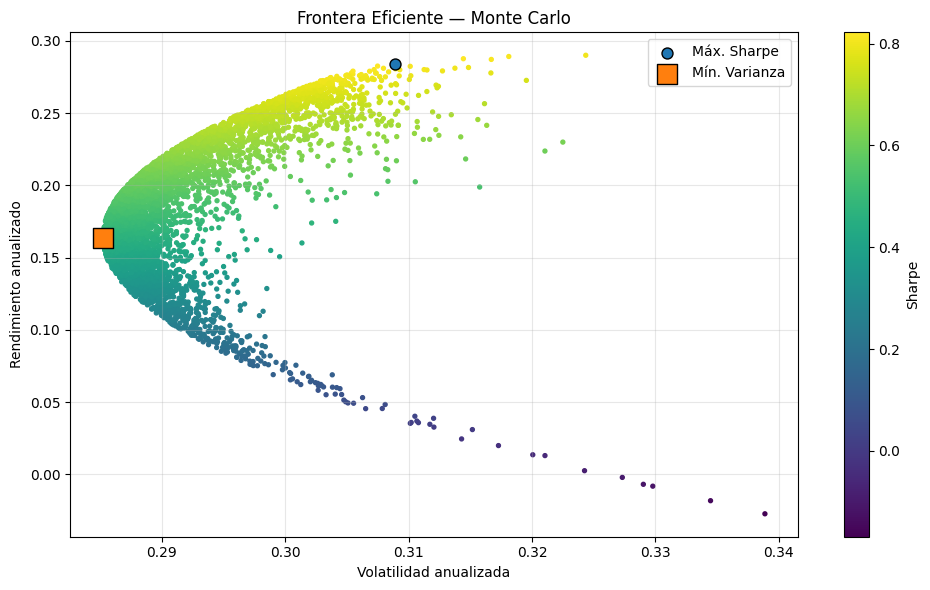

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(resultados["Volatilidad"], resultados["Rendimiento"],
            c=resultados["Sharpe"], cmap="viridis", s=8)
plt.colorbar(label="Sharpe")

plt.scatter(resultados.loc[idx_max_sharpe, "Volatilidad"],
            resultados.loc[idx_max_sharpe, "Rendimiento"],
            marker=".", s=250, edgecolor="k", label="Máx. Sharpe")

plt.scatter(resultados.loc[idx_min_var, "Volatilidad"],
            resultados.loc[idx_min_var, "Rendimiento"],
            marker=",", s=200, edgecolor="k", label="Mín. Varianza")

plt.title("Frontera Eficiente — Monte Carlo")
plt.xlabel("Volatilidad anualizada")
plt.ylabel("Rendimiento anualizado")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()